In [1]:
import tensorflow as tf

from tensorflow.keras import layers , models # For building neural network models 
import matplotlib.pyplot as plt # For plotting graphs and visualizations

In [2]:
print(tf.__version__)

2.20.0


In [3]:
# load dataset (MNIST dataset of handwritten digits)

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


X_train: images in the training set (usually 60,000 images), each is a 28x28 grayscale image.

y_train: labels (correct digit 0-9) for each training image.

X_test: images in the test set (usually 10,000 images) used to evaluate the model.

y_test: labels for the test images.

In [4]:
#normalize the data
X_train = X_train.astype("float32") / 255.0   #astype("float32") converts the image pixel values from integers to floating-point numbers.                                            
X_test = X_test.astype("float32") / 255.0     #Pixel values in MNIST images range from 0 to 255 (since each pixel is 8-bit grayscale).
                                              #Dividing by 255.0 scales the values to the range 0.0 to 1.0.

The numbers like 0.0 are pixel brightness values scaled between 0 and 1.

0.0 means the pixel is black (no brightness).

Numbers closer to 1.0 mean brighter pixels (whiter).

In [5]:
print(X_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [6]:
#Reshaping the data to add a channel dimension (since CNNs expect 4D input: batch_size, height, width, channels)
#-1 means: "Keep the number of images (60000) automatically" — you don’t have to specify 60000 explicitly.

X_train = X_train.reshape(-1, 28,28,1)  
X_test = X_test.reshape(-1, 28,28,1)


In [7]:
print(X_train)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [8]:

#Build a simple CNN model
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),  #convolutional layer
    layers.MaxPooling2D((2,2)), #pooling layer
    layers.Flatten(),            #flatten into ID
    layers.Dense(64, activation='relu'), #fully connected layers
    layers.Dense(10, activation='softmax')  #output layer(10 classes)
])

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
#train the model
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64, #faster traning
    validation_data=(X_test,y_test),
    verbose=1   #shows progress bar
)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9452 - loss: 0.1923 - val_accuracy: 0.9771 - val_loss: 0.0696
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9803 - loss: 0.0650 - val_accuracy: 0.9806 - val_loss: 0.0616
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9858 - loss: 0.0472 - val_accuracy: 0.9830 - val_loss: 0.0493
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9896 - loss: 0.0346 - val_accuracy: 0.9828 - val_loss: 0.0489
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9914 - loss: 0.0266 - val_accuracy: 0.9847 - val_loss: 0.0448


In [11]:
#Evulate on test data
test_loss,test_acc=model.evaluate(X_test,y_test,verbose=0)
print("Test Accuracy:",round(test_acc * 100,2),"%")

Test Accuracy: 98.47 %


In [12]:
prediction=model.predict(X_test[:1])  #get prediction possibilities
predicted_label=prediction.argmax()  #find the most likely class 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


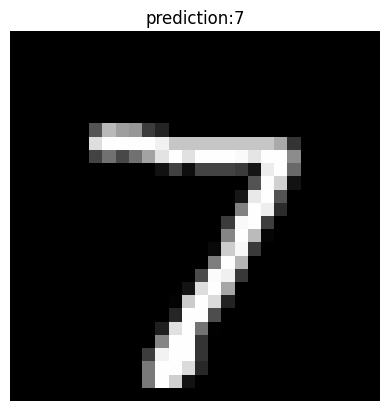

In [13]:

plt.imshow(X_test[0].reshape(28,28),cmap="gray")
plt.title("prediction:" + str(predicted_label))
plt.axis("off")
plt.show()